In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Analysis without One-hot encoding

In [13]:
data = pd.read_csv("data.csv")
data['drug'] = data['drug'].replace(["A","B","C"],[1,2,3])
data.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason,pa_feats
0,3,2.0,1,417740,1,76.0,0,1,0,0,1,CD,0
1,33,16.0,1,417740,1,76.0,0,1,1,1,0,CDTFCI,6
2,59,25.0,1,417740,1,76.0,0,1,0,0,1,CD,0
3,110,49.0,1,417740,2,70.0,0,1,0,0,0,CD,0
4,119,50.0,1,417740,2,70.0,0,1,0,0,0,CD,0


In [14]:
data_A = data[data['drug']==1]
data_B = data[data['drug']==2]
data_C = data[data['drug']==3]

In [15]:
X = data[['drug','pa_feats']]
y = data['pa_approved']
X_A = data_A[['drug','pa_feats']]
y_A = data_A['pa_approved']
X_B = data_B[['drug','pa_feats']]
y_B = data_B['pa_approved']
X_C = data_C[['drug','pa_feats']]
y_C = data_C['pa_approved']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)
X_A_train,X_A_test,y_A_train,y_A_test = train_test_split(X_A,y_A,test_size=0.2,shuffle=True,stratify=y_A)
X_B_train,X_B_test,y_B_train,y_B_test = train_test_split(X_B,y_B,test_size=0.2,shuffle=True,stratify=y_B)
X_C_train,X_C_test,y_C_train,y_C_test = train_test_split(X_C,y_C,test_size=0.2,shuffle=True,stratify=y_C)

### Decision Tree Classifier

CV Mean Accuracy is [0.65883826 0.7342391  0.73356039 0.75638853 0.75638853 0.75551588
 0.75551588 0.75551588 0.75551588 0.75551588]
CV Mean Precision is [0.83395888 0.84632887 0.85763957 0.79597814 0.79597814 0.7887027
 0.7887027  0.7887027  0.7887027  0.7887027 ]
CV Mean Recall is [0.5721374  0.70619848 0.6922554  0.82484505 0.82484505 0.83673502
 0.83673502 0.83673502 0.83673502 0.83673502]


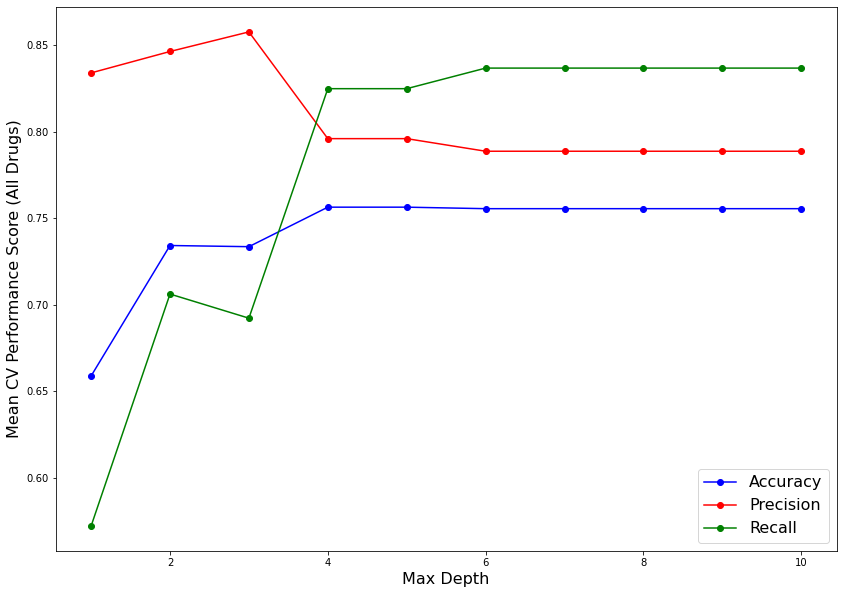

In [16]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All Drugs)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


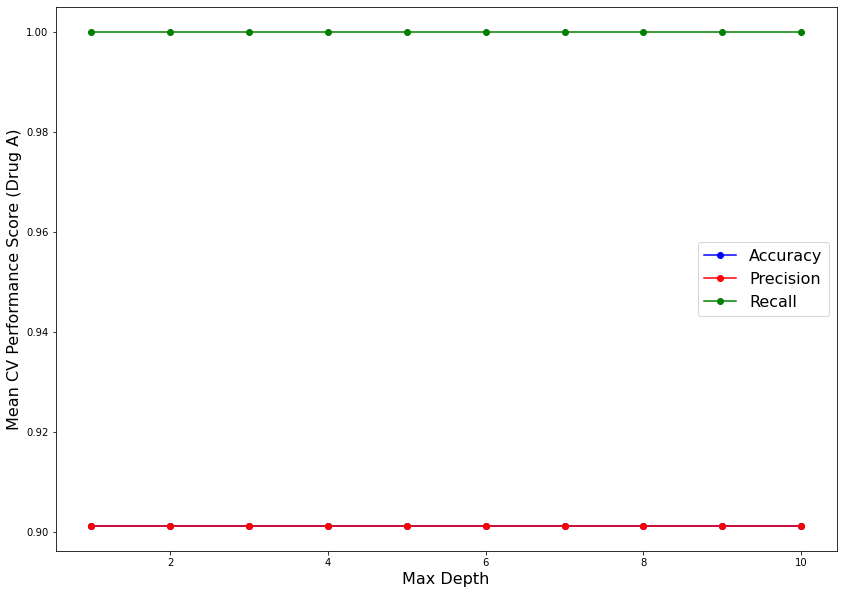

In [17]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

CV Mean Accuracy is [0.61002089 0.65755869 0.65755869 0.65715    0.65715    0.65715
 0.65715    0.65715    0.65715    0.65715   ]
CV Mean Precision is [0.         0.57435226 0.57435226 0.56032275 0.56032275 0.56032275
 0.56032275 0.56032275 0.56032275 0.56032275]
CV Mean Recall is [0.         0.47087944 0.47087944 0.56365754 0.56365754 0.56365754
 0.56365754 0.56365754 0.56365754 0.56365754]


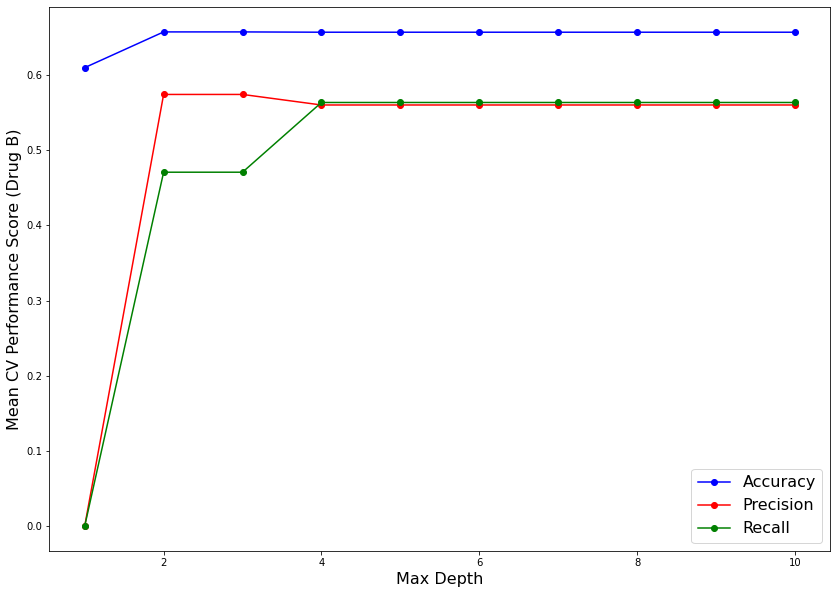

In [19]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.83411803 0.83411803 0.8365095  0.8365095  0.8365095  0.8365095
 0.8365095  0.8365095  0.8365095  0.8365095 ]
CV Mean Precision is [0.83411803 0.83411803 0.84189184 0.84189184 0.84189184 0.84189184
 0.84189184 0.84189184 0.84189184 0.84189184]
CV Mean Recall is [1.         1.         0.98990567 0.98990567 0.98990567 0.98990567
 0.98990567 0.98990567 0.98990567 0.98990567]


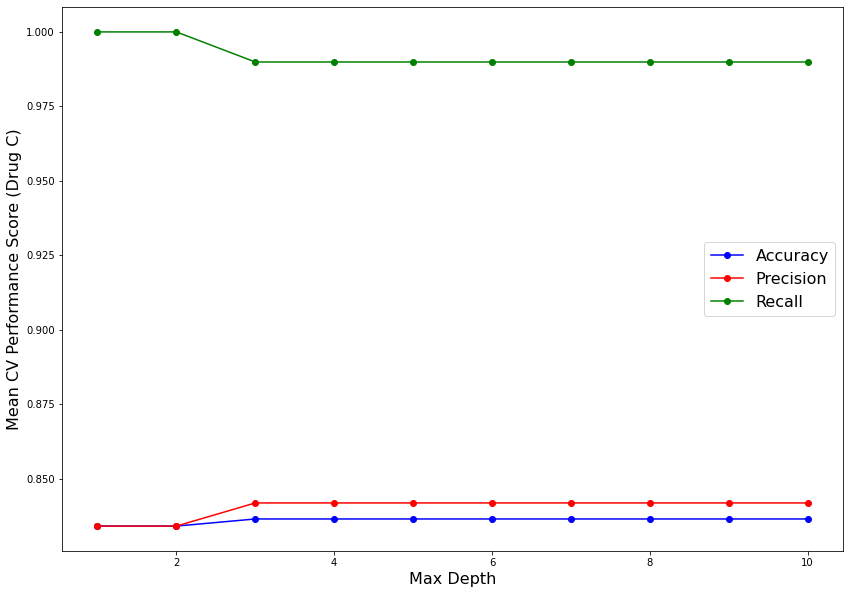

In [21]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

### Random Forest Classifier

CV Mean Accuracy is [0.75596835 0.75565594 0.75561285 0.75549434]
CV Mean Precision is [0.79232186 0.79051589 0.79019997 0.79012407]
CV Mean Recall is [0.83055887 0.83375765 0.8339292  0.83415161]


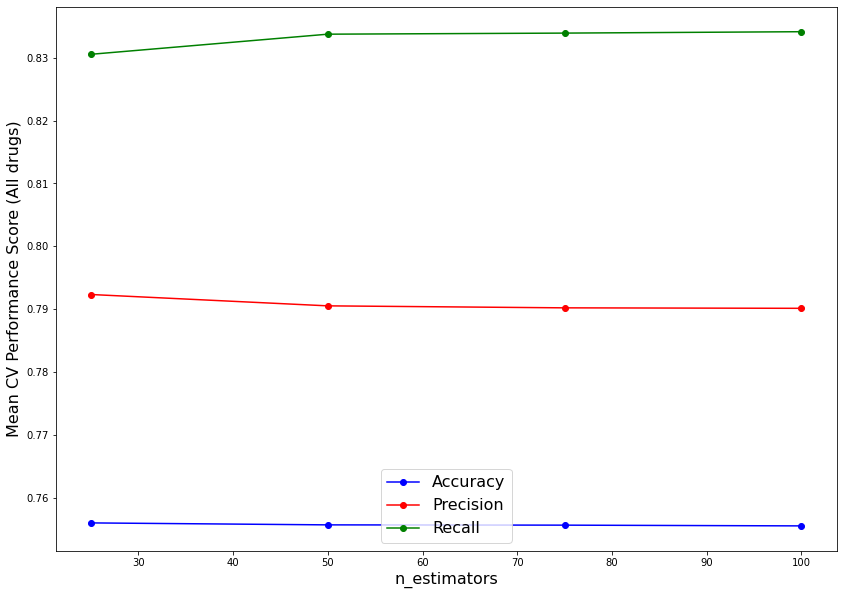

In [22]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,125,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,125,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,125,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,125,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1.]


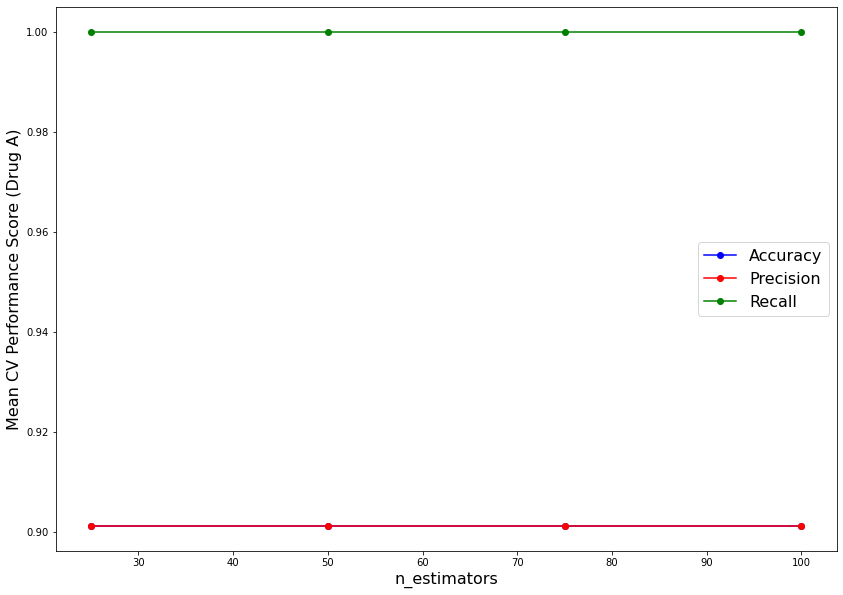

In [23]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,125,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,125,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,125,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,125,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.65633228 0.65633228 0.65633228 0.65715   ]
CV Mean Precision is [0.56235674 0.56235674 0.56235674 0.56032275]
CV Mean Recall is [0.54228305 0.54228305 0.54228305 0.56365754]


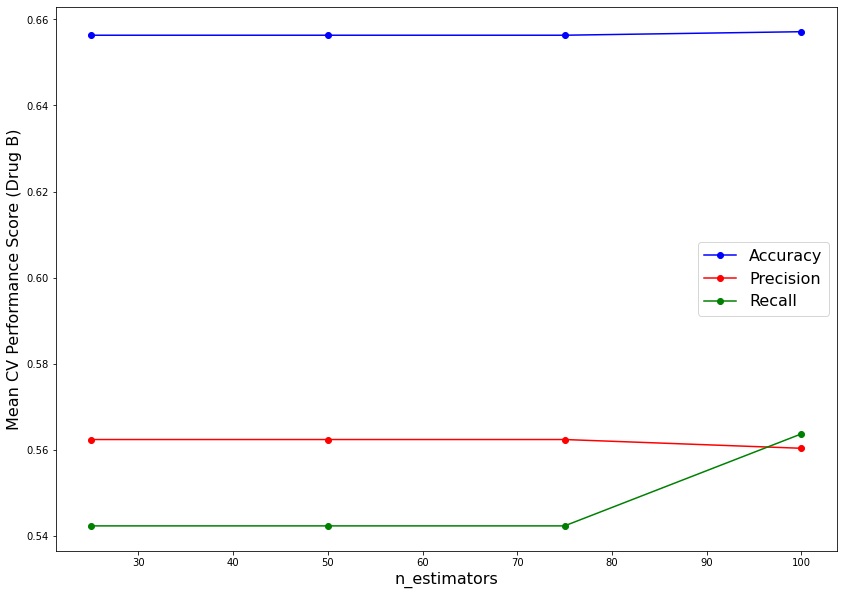

In [24]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,125,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,125,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,125,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,125,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.8365095 0.8365095 0.8365095 0.8365095]
CV Mean Precision is [0.84189184 0.84189184 0.84189184 0.84189184]
CV Mean Recall is [0.98990567 0.98990567 0.98990567 0.98990567]


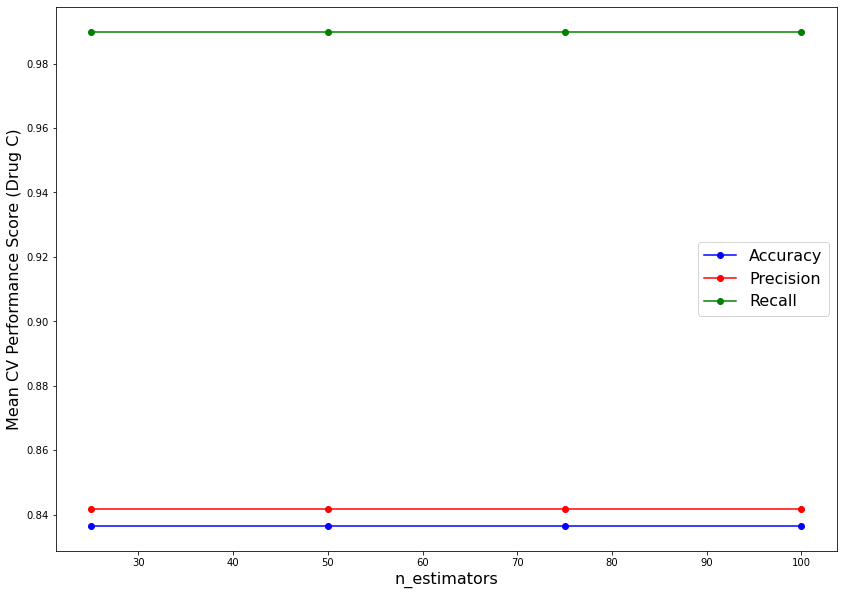

In [25]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,125,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,125,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,125,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,125,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()